In [ ]:
# Download dataset
!gdown 1PFj3USCXdYeOsn394j_Zlclm4EilQpbg
!gdown 1pBXbkjHb4sgU5CoxM6u0v8GGLbYDsZno

Downloading...
From: https://drive.google.com/uc?id=1PFj3USCXdYeOsn394j_Zlclm4EilQpbg
To: /content/rsbekasi.csv
100% 361/361 [00:00<00:00, 237kB/s]
Downloading...
From: https://drive.google.com/uc?id=1pBXbkjHb4sgU5CoxM6u0v8GGLbYDsZno
To: /content/DataJmlPenduduk_KotaBekasi.csv
100% 620/620 [00:00<00:00, 2.15MB/s]


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df_rs = pd.read_csv('/content/rsbekasi.csv')
df_penduduk = pd.read_csv('/content/DataJmlPenduduk_KotaBekasi.csv')

In [ ]:
df_rs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Kecamatan                        13 non-null     object
 1   Jumlah Rumah Sakit Umum          13 non-null     int64 
 2   Jumlah Rumah Sakit Khusus        13 non-null     int64 
 3   Jumlah Puskesmas Rawat Inap      13 non-null     int64 
 4   Jumlah Puskesmas Non Rawat Inap  13 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 648.0+ bytes


In [ ]:
df_penduduk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 6 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Kecamatan                                13 non-null     object 
 1   Jumlah Penduduk                          13 non-null     float64
 2   Laju Pertumbuhan Penduduk per Tahun      13 non-null     float64
 3   Persentase Penduduk                      13 non-null     float64
 4   Kepadatan Penduduk per km persegi (km2)  13 non-null     int64  
 5   Rasio Jenis Kelamin Penduduk             13 non-null     float64
dtypes: float64(4), int64(1), object(1)
memory usage: 752.0+ bytes


In [ ]:
for _ in [df_rs, df_penduduk]:
  print(f"Missing Value Checking :\n{_.isnull().sum()}\n")

Missing Value Checking :
Kecamatan                          0
Jumlah Rumah Sakit Umum            0
Jumlah Rumah Sakit Khusus          0
Jumlah Puskesmas Rawat Inap        0
Jumlah Puskesmas Non Rawat Inap    0
dtype: int64

Missing Value Checking :
Kecamatan                                  0
Jumlah Penduduk                            0
Laju Pertumbuhan Penduduk per Tahun        0
Persentase Penduduk                        0
Kepadatan Penduduk per km persegi (km2)    0
Rasio Jenis Kelamin Penduduk               0
dtype: int64



In [ ]:
df_rs = df_rs.fillna(0)

In [ ]:
for _ in [df_rs, df_penduduk]:
  print(f"Duplicate Value Checking :\n{_.duplicated().sum()}\n")

NameError: name 'df_rs' is not defined

In [ ]:
column = df_rs.iloc[:, 1:-1].columns.to_list()
df_rs[column] = df_rs[column].astype(int, copy=True)

In [ ]:
df = pd.merge(df_rs, df_penduduk, on='Kecamatan').copy(deep=True)

df = df.iloc[:-1, :].copy(deep=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Kecamatan                                12 non-null     object 
 1   Jumlah Rumah Sakit Umum                  12 non-null     int64  
 2   Jumlah Rumah Sakit Khusus                12 non-null     int64  
 3   Jumlah Puskesmas Rawat Inap              12 non-null     int64  
 4   Jumlah Puskesmas Non Rawat Inap          12 non-null     int64  
 5   Jumlah Penduduk                          12 non-null     float64
 6   Laju Pertumbuhan Penduduk per Tahun      12 non-null     float64
 7   Persentase Penduduk                      12 non-null     float64
 8   Kepadatan Penduduk per km persegi (km2)  12 non-null     int64  
 9   Rasio Jenis Kelamin Penduduk             12 non-null     float64
dtypes: float64(4), int64(5), object(1)
memory usage: 1.1

In [ ]:
df.head()

,Kecamatan,Jumlah Rumah Sakit Umum,Jumlah Rumah Sakit Khusus,Jumlah Puskesmas Rawat Inap,Jumlah Puskesmas Non Rawat Inap,Jumlah Penduduk,Laju Pertumbuhan Penduduk per Tahun,Persentase Penduduk,Kepadatan Penduduk per km persegi (km2),Rasio Jenis Kelamin Penduduk
0,Pondokgede,3,0,0,4,254.1,0.44,9.67,15,100.7
1,Jatisampurna,4,0,0,3,131.3,2.00,5.00,7,101.2
2,Pondokmelati,1,0,0,2,132.6,0.42,5.05,12,101.3
3,Jatiasih,2,0,0,4,265.3,2.42,10.10,11,100.4
4,Bantargebang,3,0,0,4,111.4,1.35,4.24,6,103.0


In [ ]:
df.describe()

,Jumlah Rumah Sakit Umum,Jumlah Rumah Sakit Khusus,Jumlah Puskesmas Rawat Inap,Jumlah Puskesmas Non Rawat Inap,Jumlah Penduduk,Laju Pertumbuhan Penduduk per Tahun,Persentase Penduduk,Kepadatan Penduduk per km persegi (km2),Rasio Jenis Kelamin Penduduk
count,12.000000,12.000000,12.0,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,3.750000,0.250000,0.0,4.000000,218.933333,1.150833,8.332500,12.750000,101.233333
std,2.767506,0.452267,0.0,1.044466,71.595128,0.902043,2.724562,4.136863,1.433580
min,0.000000,0.000000,0.0,2.000000,111.400000,0.320000,4.240000,6.000000,99.200000
25%,2.750000,0.000000,0.0,3.750000,155.700000,0.545000,5.927500,10.500000,100.275000
50%,3.000000,0.000000,0.0,4.000000,229.750000,0.725000,8.740000,12.500000,101.250000
75%,4.000000,0.250000,0.0,4.250000,262.450000,1.512500,9.987500,15.500000,102.400000
max,10.000000,1.000000,0.0,6.000000,347.800000,3.110000,13.240000,19.000000,103.500000


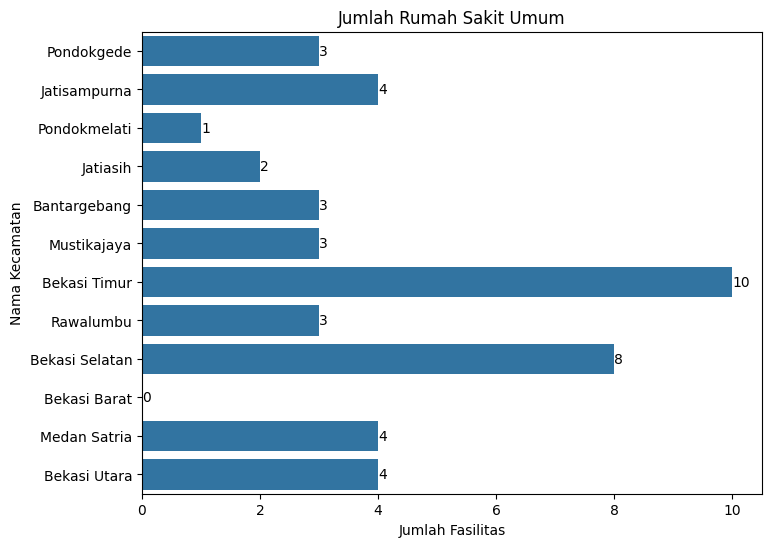

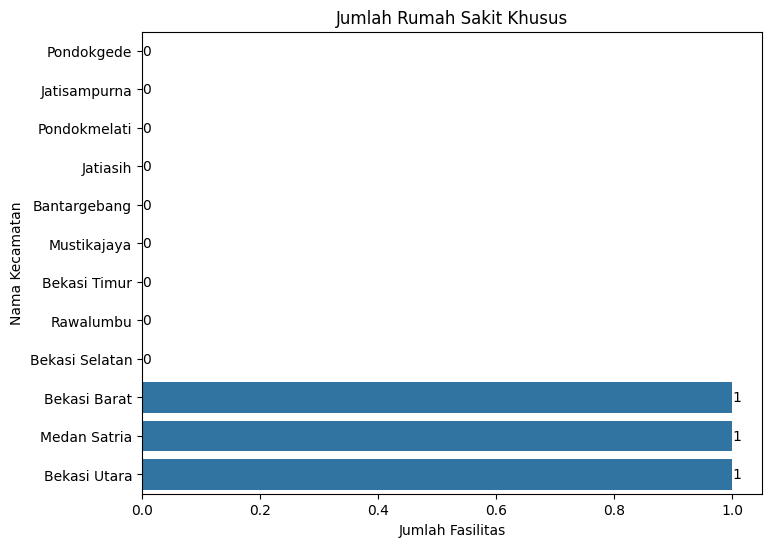

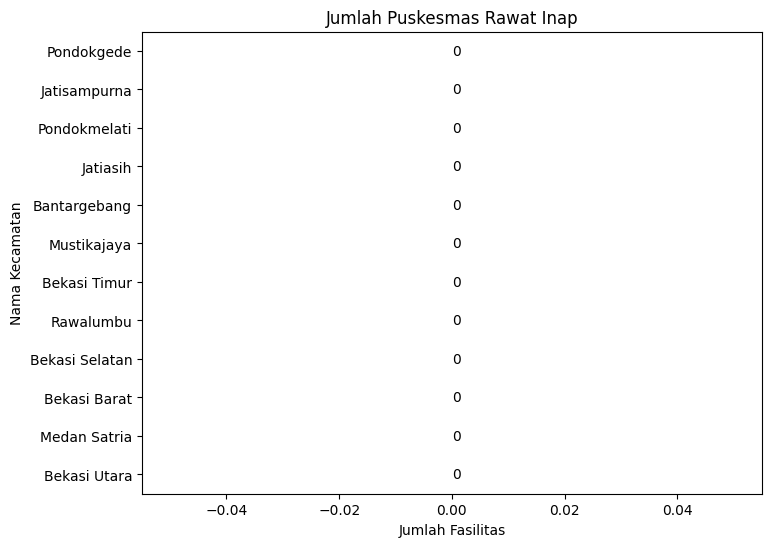

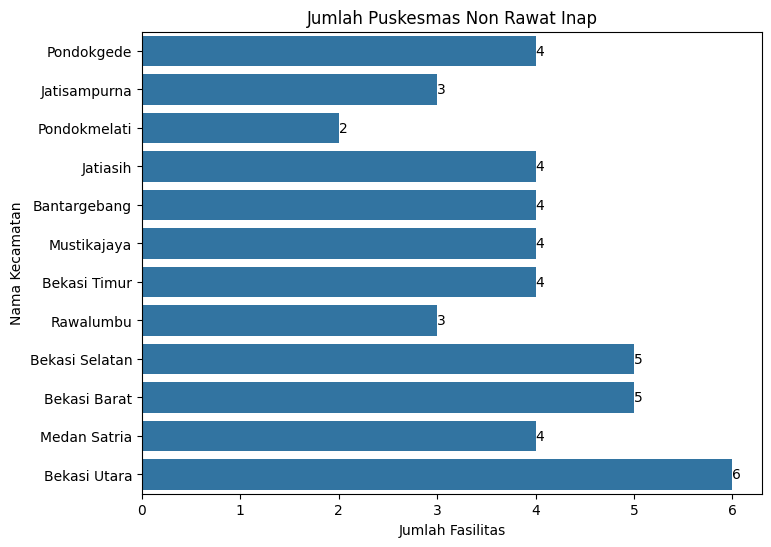

In [ ]:
for column in df.iloc[:, 1:5].columns:
    plt.figure(figsize=(8, 6))
    ax = sns.barplot(x=df[column], y=df['Kecamatan'])
    plt.title(f'{column}')
    plt.xlabel("Jumlah Fasilitas")
    plt.ylabel('Nama Kecamatan')
    ax.bar_label(ax.containers[0], fontsize=10)
    plt.show()

Text(0, 0.5, 'Nama Kecamatan')

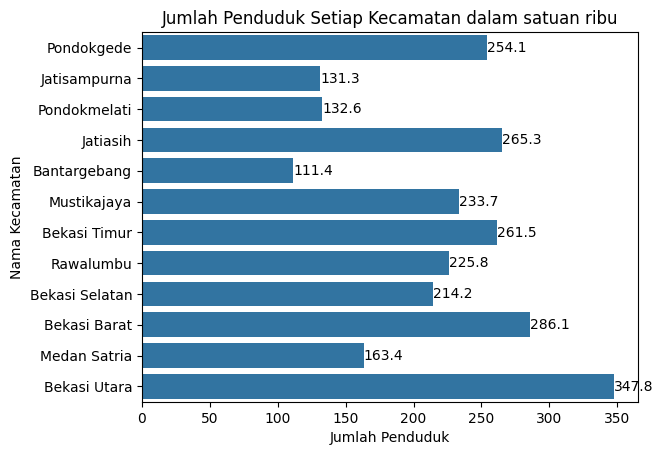

In [ ]:
ax = sns.barplot(x=df["Jumlah Penduduk"], y=df["Kecamatan"])
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Jumlah Penduduk Setiap Kecamatan dalam satuan ribu')
plt.xlabel("Jumlah Penduduk")
plt.ylabel('Nama Kecamatan')

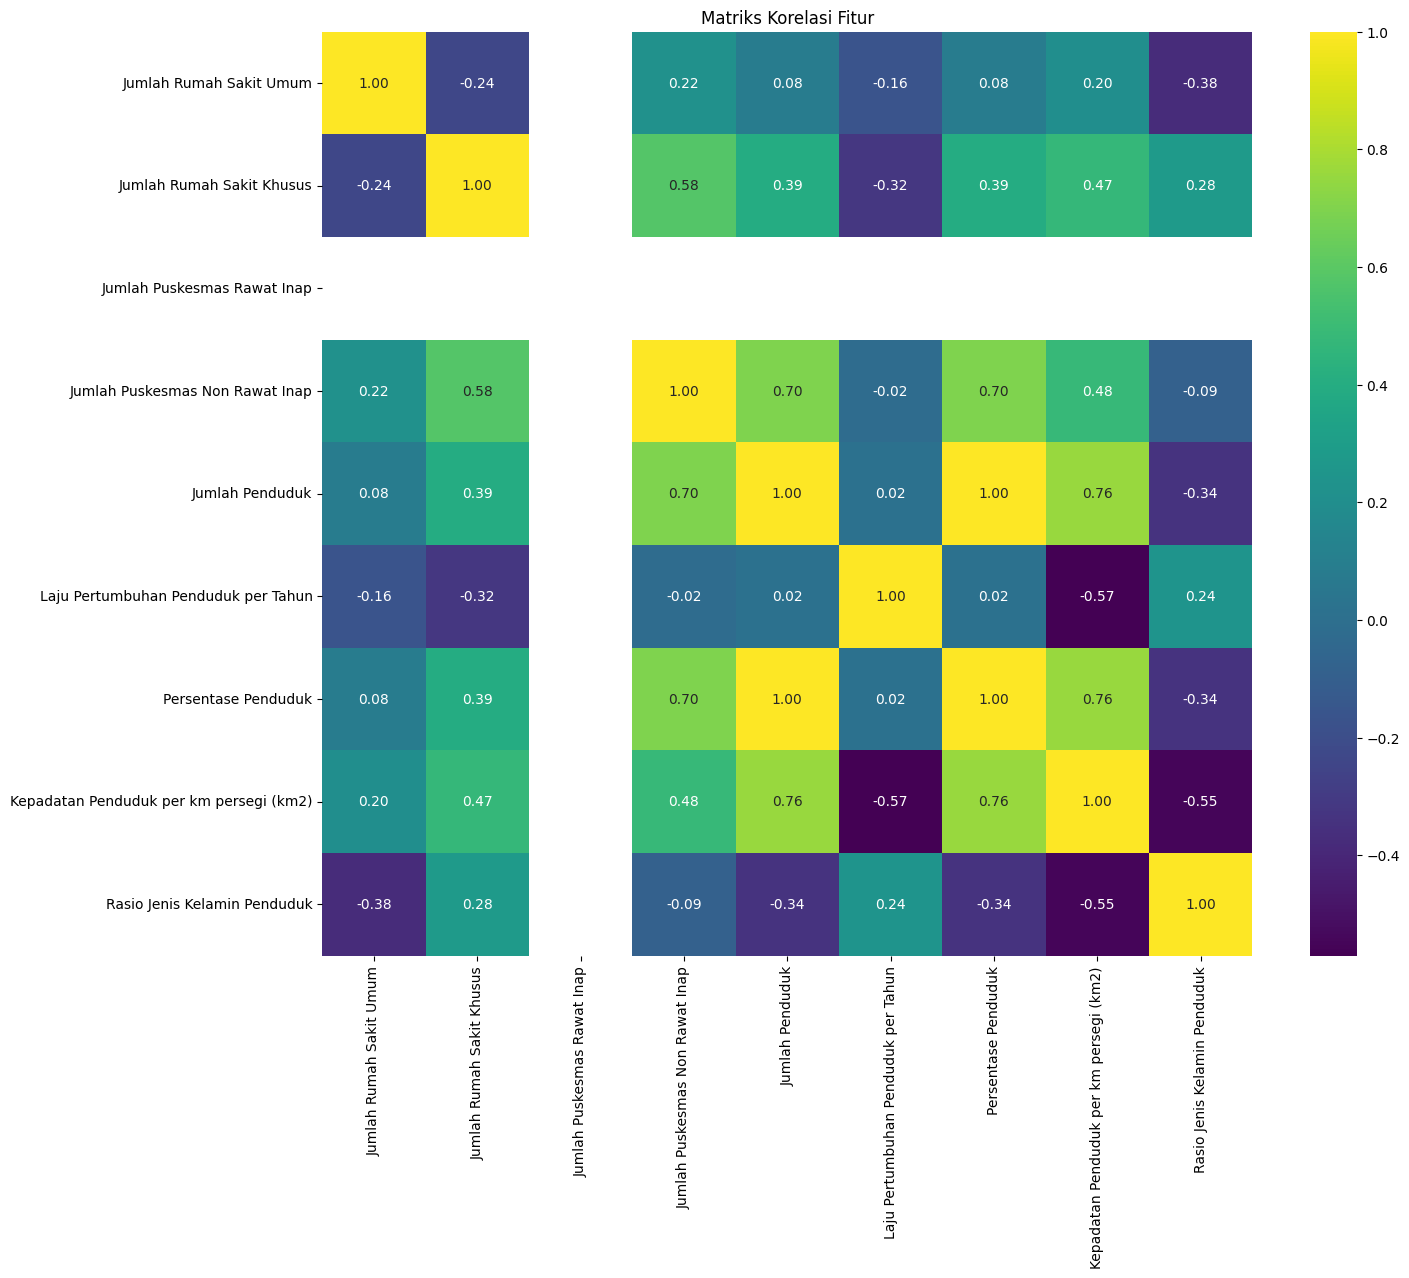

In [ ]:
correlation_matrix = df.iloc[:, 1:].corr()
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Matriks Korelasi Fitur')
plt.show()

In [ ]:
df[['Jumlah Penduduk', "Kepadatan Penduduk per km persegi (km2)","Jumlah Rumah Sakit Umum"]].corr()

,Jumlah Penduduk,Kepadatan Penduduk per km persegi (km2),Jumlah Rumah Sakit Umum
Jumlah Penduduk,1.000000,0.756759,0.084789
Kepadatan Penduduk per km persegi (km2),0.756759,1.000000,0.200497
Jumlah Rumah Sakit Umum,0.084789,0.200497,1.000000


In [ ]:
from sklearn.cluster import KMeans

x = df.iloc[:, 1:6].copy(deep=True)

In [ ]:
model = KMeans(n_clusters=5, random_state=42)
model.fit(x)

KMeans(n_clusters=5, random_state=42)

In [ ]:
label = model.labels_

In [ ]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(x, label)

0.2960124243151126

In [ ]:
df["Cluster"] = label

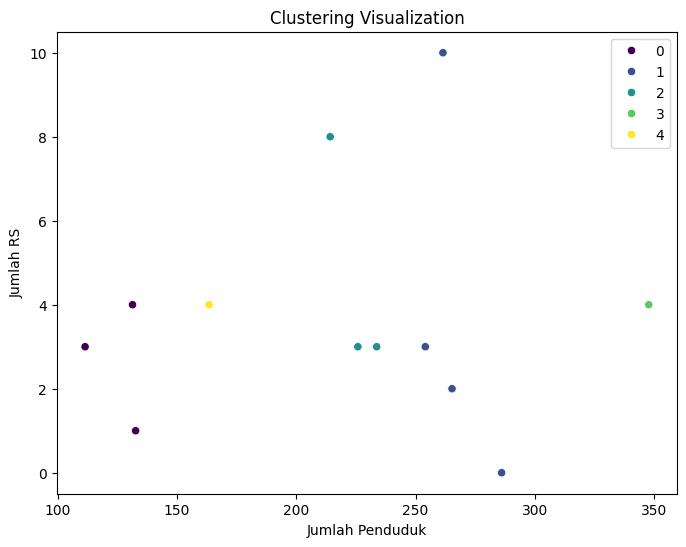

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Jumlah Penduduk"], y=df["Jumlah Rumah Sakit Umum"], hue=df['Cluster'], data=df, palette="viridis")
plt.title('Clustering Visualization')
plt.xlabel('Jumlah Penduduk')
plt.ylabel('Jumlah RS')
plt.legend()
plt.show()

In [ ]:
import plotly.express as px
fig = px.scatter_3d(df, x=df["Jumlah Penduduk"], y=df["Jumlah Rumah Sakit Umum"], z=df["Kepadatan Penduduk per km persegi (km2)"],
              color=df["Cluster"])
fig.show()

In [ ]:
df.Cluster.value_counts().reset_index().sort_values(by="Cluster", ascending=True).set_index("Cluster")

,count
Cluster,
0,3
1,4
2,3
3,1
4,1


In [ ]:
df.query("Cluster == 0")

,Kecamatan,Jumlah Rumah Sakit Umum,Jumlah Rumah Sakit Khusus,Jumlah Puskesmas Rawat Inap,Jumlah Puskesmas Non Rawat Inap,Jumlah Penduduk,Laju Pertumbuhan Penduduk per Tahun,Persentase Penduduk,Kepadatan Penduduk per km persegi (km2),Rasio Jenis Kelamin Penduduk,Cluster
1,Jatisampurna,4,0,0,3,131.3,2.00,5.00,7,101.2,0
2,Pondokmelati,1,0,0,2,132.6,0.42,5.05,12,101.3,0
4,Bantargebang,3,0,0,4,111.4,1.35,4.24,6,103.0,0


In [ ]:
df.query("Cluster == 1")

,Kecamatan,Jumlah Rumah Sakit Umum,Jumlah Rumah Sakit Khusus,Jumlah Puskesmas Rawat Inap,Jumlah Puskesmas Non Rawat Inap,Jumlah Penduduk,Laju Pertumbuhan Penduduk per Tahun,Persentase Penduduk,Kepadatan Penduduk per km persegi (km2),Rasio Jenis Kelamin Penduduk,Cluster
0,Pondokgede,3,0,0,4,254.1,0.44,9.67,15,100.7,1
3,Jatiasih,2,0,0,4,265.3,2.42,10.10,11,100.4,1
6,Bekasi Timur,10,0,0,4,261.5,0.63,9.95,18,99.2,1
9,Bekasi Barat,0,1,0,5,286.1,0.58,10.89,19,99.9,1


In [ ]:
df.query("Cluster == 2")

,Kecamatan,Jumlah Rumah Sakit Umum,Jumlah Rumah Sakit Khusus,Jumlah Puskesmas Rawat Inap,Jumlah Puskesmas Non Rawat Inap,Jumlah Penduduk,Laju Pertumbuhan Penduduk per Tahun,Persentase Penduduk,Kepadatan Penduduk per km persegi (km2),Rasio Jenis Kelamin Penduduk,Cluster
5,Mustikajaya,3,0,0,4,233.7,3.11,8.89,9,102.7,2
7,Rawalumbu,3,0,0,3,225.8,0.82,8.59,13,101.4,2
8,Bekasi Selatan,8,0,0,5,214.2,0.60,8.15,14,99.2,2


In [ ]:
df.query("Cluster == 3")

,Kecamatan,Jumlah Rumah Sakit Umum,Jumlah Rumah Sakit Khusus,Jumlah Puskesmas Rawat Inap,Jumlah Puskesmas Non Rawat Inap,Jumlah Penduduk,Laju Pertumbuhan Penduduk per Tahun,Persentase Penduduk,Kepadatan Penduduk per km persegi (km2),Rasio Jenis Kelamin Penduduk,Cluster
11,Bekasi Utara,4,1,0,6,347.8,1.12,13.24,17,102.3,3


In [ ]:
df.query("Cluster == 4")

,Kecamatan,Jumlah Rumah Sakit Umum,Jumlah Rumah Sakit Khusus,Jumlah Puskesmas Rawat Inap,Jumlah Puskesmas Non Rawat Inap,Jumlah Penduduk,Laju Pertumbuhan Penduduk per Tahun,Persentase Penduduk,Kepadatan Penduduk per km persegi (km2),Rasio Jenis Kelamin Penduduk,Cluster
10,Medan Satria,4,1,0,4,163.4,0.32,6.22,12,103.5,4
